# Digit Recognition using MNIST #

In [2]:
import matplotlib.pyplot as plt
import math as mt

## Extracting the training images ##

In [1]:
#extracting data from the .gz file into images and label
from struct import unpack
import gzip
import numpy as np


def get_labeled_data(imagefile, labelfile):
    """Read input-vector (image) and target class (label, 0-9) and return
       it as list of tuples.
    """
    # Open the images with gzip in read binary mode
    images = gzip.open(imagefile, 'rb')
    labels = gzip.open(labelfile, 'rb')

    # Read the binary data

    # We have to get big endian unsigned int. So we need '>I'

    # Get metadata for images
    images.read(4)  # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]
    # Get metadata for labels
    labels.read(4)  # skip the magic_number
    N = labels.read(4)
    N = unpack('>I', N)[0]

    if number_of_images != N:
        raise Exception('number of labels did not match the number of images')

    # Get the data
    x = np.ndarray((N, rows, cols), dtype='uint8')  # Initialize numpy array
    y = np.ndarray((N, 1), dtype='uint8')  # Initialize numpy array
    for i in range(N):
        if i % 1000 == 0:
            print("i: %i" % i)
        for row in range(rows):
            for col in range(cols):
                tmp_pixel = images.read(1)  # Just a single byte
                tmp_pixel = unpack('>B', tmp_pixel)[0]
                x[i][row][col] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]
    return (x, y)

In [3]:
#using the function to extract images
x,y = get_labeled_data('train-images-idx3-ubyte.gz', 'train-labels-idx1-ubyte.gz')

i: 0
i: 1000
i: 2000
i: 3000
i: 4000
i: 5000
i: 6000
i: 7000
i: 8000
i: 9000
i: 10000
i: 11000
i: 12000
i: 13000
i: 14000
i: 15000
i: 16000
i: 17000
i: 18000
i: 19000
i: 20000
i: 21000
i: 22000
i: 23000
i: 24000
i: 25000
i: 26000
i: 27000
i: 28000
i: 29000
i: 30000
i: 31000
i: 32000
i: 33000
i: 34000
i: 35000
i: 36000
i: 37000
i: 38000
i: 39000
i: 40000
i: 41000
i: 42000
i: 43000
i: 44000
i: 45000
i: 46000
i: 47000
i: 48000
i: 49000
i: 50000
i: 51000
i: 52000
i: 53000
i: 54000
i: 55000
i: 56000
i: 57000
i: 58000
i: 59000


In [4]:
print(x.size)
print(x.shape)
print(len(x))
print(len(y))
print(len(x[1]))
print(len(x[1][1]))
print(len(y[1]))

47040000
(60000, 28, 28)
60000
60000
28
28
1


In [5]:
print(y)

[[5]
 [0]
 [4]
 ..., 
 [5]
 [6]
 [8]]


##  Few examples of pre-processed images ##

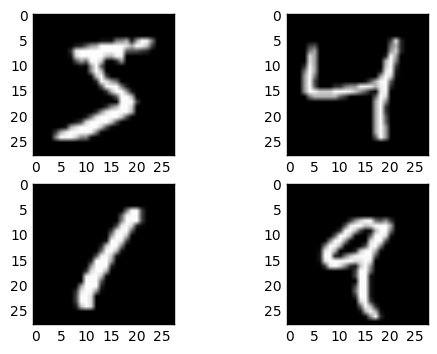

In [6]:
# examples of few unprocessed images
plt.subplot(221)
plt.imshow(x[0],'gray')
plt.subplot(222)
plt.imshow(x[2],'gray')
plt.subplot(223)
plt.imshow(x[3],'gray')
plt.subplot(224)
plt.imshow(x[4],'gray')
plt.show()

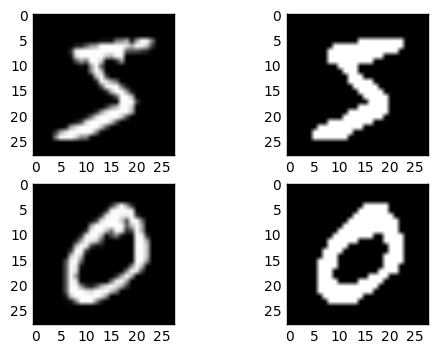

In [7]:
#processing of images  using OTSU's method
#displaying the changes made in the images
import cv2
import numpy as np
img1= x[0]
img2 = x[1]
blur1 = cv2.GaussianBlur(img1,(5,5),0)
blur2 = cv2.GaussianBlur(img2,(5,5),0)
ret1,th1 = cv2.threshold(blur1,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret2,th2 = cv2.threshold(blur2,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.subplot(221)
plt.imshow(img1,'gray')
plt.subplot(222)
plt.imshow(th1,'gray')
plt.subplot(223)
plt.imshow(img2,'gray')
plt.subplot(224)
plt.imshow(th2,'gray')
plt.show()

## Thresholding Images ##

In [8]:
#Thresholding all the images
for i in range(len(x)):
    img = x[i]
    blur = cv2.GaussianBlur(img,(5,5),0)
    ret,x[i] = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    

## Averaging the Image Vectors into respective arrays **(10x28x28)** ##

In [9]:
# taking average of all the images and storing in one matrix 10x28x28
#size corresponds to the number of images of each digit
img_avg = np.zeros((10,28,28),dtype = 'int32')
size = np.zeros(10,dtype='int32')
for i in range(10):
    for j in range(60000):
        if(y[j] == i):
            for row in range(28):
                for col in range(28):
                    img_avg[i][row][col] = img_avg[i][row][col] + x[j][row][col]
            size[i] += 1
    print(i, size[i])

for i in range(10):
    img_avg[i] = img_avg[i] / size[i] 
    

0 5923
1 6742
2 5958
3 6131
4 5842
5 5421
6 5918
7 6265
8 5851
9 5949


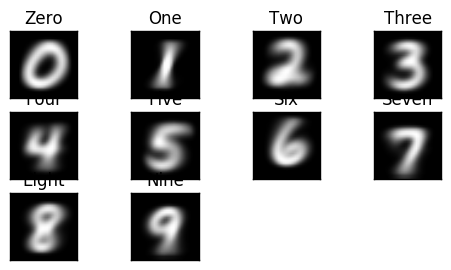

In [10]:
# plotting all the averaged out images
titles = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']
images = [img_avg[0],img_avg[1] ,img_avg[2],img_avg[3],img_avg[4],img_avg[5],img_avg[6],img_avg[7],img_avg[8],img_avg[9]]
for i in range(10):
    plt.subplot(4,4,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [11]:
#type casting the images
var = np.zeros((10,28,28),dtype = 'uint8')
for i in range (10):
    var[i] = img_avg[i].astype('uint8')
img_avg = var

In [12]:
img_avg.shape

(10, 28, 28)

In [13]:
# creating the vectors of the images
img_vec = np.zeros((786,10),dtype = 'float32')
for i in range(10):
    c = 0
    for j in range(28):
        for k in range(28):
            img_vec[c][i] = img_avg[i][j][k]
            c = c + 1

In [14]:
img_vec.shape

(786, 10)

### _Average Digit Vector_ to average the digits

In [15]:
# creating the average digit vector
vec = np.zeros(786,dtype = 'float32')
for i in range(786):
    for j in range(10):
        vec[i] += img_vec[i][j]
    vec[i] = vec[i] / 10

In [16]:
# subtracting each digit from the average vector
for i in range(786):
    for j in range(10):
        img_vec[i][j] = img_vec[i][j] - vec[i]    

In [17]:
img_vec[:,0]

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        -1.00000001e-01,  -1.00000001e-01,  -1.00000001e-01,
        -1.00000001e-01,  -1.00000001e-01,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,  -1.00000001e-01,
        -1.00000001e-01,  -2.00000003e-01,  -2.00000003e-01,
        -2.00000003e-01,  -2.00000003e-01,  -2.00000003e-01,
        -1.00000001e-01,  -1.00000001e-01,   0.00000000e+00,
         0.00000000e+00,

In [18]:
a= img_vec
b = a.transpose()

In [19]:
img_mul = np.zeros((10,10),dtype='float32')
len(a)

786

# PCA #

In [20]:
def matmul(a,b):
    rows_A = len(a)
    cols_A = len(a[0])
    rows_B = len(b)
    cols_B = len(b[0])
    mat = np.zeros((rows_A,cols_B),dtype = 'float32')
    for i in range(rows_A):
            for j in range(cols_B):
                for k in range(cols_A):
                    mat[i][j] += a[i][k] * b[k][j]
    return mat

## Calculation of Eigen Vectors of AA'. ##
##### Multiplication of AA' is very expensive. The size of the array becomes 786x786. We instead multiply A'A. The size of this array becomes 10x10. The eigen vectors with respect to this are the best.  

In [21]:
img_mul = matmul(b,a)

In [22]:
if(np.isnan(img_mul).any()):
    img_mul = np.nan_to_num(img_mul)

In [23]:
W,V = np.linalg.eig(img_mul)

In [24]:
print('Eigen Vectors are \n', V, '\nEigen Values are\n', W )

Eigen Vectors are 
 [[ 0.74981326 -0.13256563  0.19410579 -0.4317835  -0.31622794 -0.08266932
  -0.14320591  0.11728632 -0.12597409  0.19779934]
 [-0.46802005  0.52500468  0.05908781 -0.48974434 -0.3162277  -0.31917813
  -0.1001591   0.14536025 -0.08172572  0.14923546]
 [ 0.10968275  0.33947814 -0.32925099 -0.03643297 -0.31622785  0.67416602
  -0.11222312  0.19089131  0.38071933 -0.12045787]
 [ 0.06878152  0.27919668  0.38217357  0.43553665 -0.31622764  0.13473147
   0.57020468  0.1834913  -0.26153487  0.19029997]
 [-0.17372999 -0.43002081 -0.30026644  0.09701371 -0.31622809 -0.09288783
  -0.05149538  0.62005472 -0.33074629 -0.28317356]
 [ 0.11824616  0.03926395  0.22577186  0.18974601 -0.31622741 -0.45910552
   0.04279504 -0.02928394  0.55607557 -0.52422613]
 [ 0.13037661  0.03057449 -0.66906261  0.00622656 -0.31622759 -0.23195055
   0.3663559  -0.47548187 -0.12991199  0.0583601 ]
 [-0.2869339  -0.36855805  0.32753775 -0.35654503 -0.31622797  0.37944025
   0.18388873 -0.40775743 -0.11

In [25]:
W.shape

(10,)

In [26]:
V.shape

(10, 10)

In [27]:
eigs = matmul(img_vec,V)

In [28]:
eigs[:,0]

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         1.30376607e-01,   1.30376607e-01,   1.30376607e-01,
         1.30376607e-01,   1.30376607e-01,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   1.30376607e-01,
         1.30376607e-01,   2.60753214e-01,   2.60753214e-01,
         2.60753214e-01,   2.60753214e-01,   2.60753214e-01,
         1.30376607e-01,   1.30376607e-01,   0.00000000e+00,
         0.00000000e+00,

In [29]:
eigs.shape

(786, 10)

In [30]:
W

array([  3.24536175e+06,   2.38304350e+06,   1.96627188e+06,
         1.15004650e+06,  -3.54687780e-01,   8.84054875e+05,
         6.43882875e+05,   4.86209375e+05,   1.46918859e+05,
         2.03394906e+05], dtype=float32)

### Taking the best Eigen vectors. Earlier I decided to use the best 5. But inoder to increase the accuracy, had to take up all 10 vectors. ###

In [31]:

bestW= np.zeros(10,dtype = 'float32')
bestV = np.zeros((786,10),dtype = 'float32')
for i in range(10):
    max = 0
    index = -1
    for j in range(10):
        if(W[j] > max):
            max = W[j]
            index = j
    bestW[i] = W[index]
    bestV[:,i] = eigs[:,index]
    W[index] = 0.0
bestW[9] = W[4]
bestV[9] = eigs[4]
        
    


In [32]:
bestW

array([  3.24536175e+06,   2.38304350e+06,   1.96627188e+06,
         1.15004650e+06,   8.84054875e+05,   6.43882875e+05,
         4.86209375e+05,   2.03394906e+05,   1.46918859e+05,
        -3.54687780e-01], dtype=float32)

In [33]:
W

array([ 0.        ,  0.        ,  0.        ,  0.        , -0.35468778,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ], dtype=float32)

In [34]:
print(bestV.shape)
print(bestW.shape)

(786, 10)
(10,)


In [35]:
bestV.transpose().shape

(10, 786)

In [36]:
temp = bestV.transpose()

### Normalizing the images w.r.t the Eigen Vectors ###

In [37]:
# normalized images with respect to eigen vectors
omega = np.zeros((10,10),dtype = 'float32')
bestV_trans = bestV.transpose()
for i in range(10):
    for j in range(10):
        sum1 = 0
        for k in range(786):
            sum1 = sum1 + temp[j][k] * img_vec[k][i]
        omega[j][i] = sum1
        

# TEST SET #

In [38]:
test_x,test_y = get_labeled_data('t10k-images-idx3-ubyte.gz', 't10k-labels-idx1-ubyte.gz')

i: 0
i: 1000
i: 2000
i: 3000
i: 4000
i: 5000
i: 6000
i: 7000
i: 8000
i: 9000


### Thresholding ###

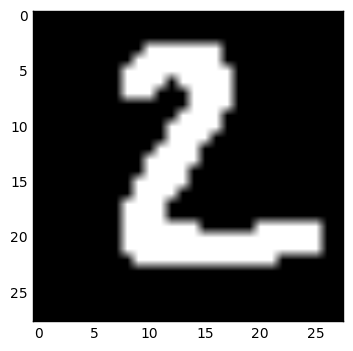

In [39]:
#Thresholding all the images
for i in range(len(test_x)):
    img = test_x[i]
    blur = cv2.GaussianBlur(img,(5,5),0)
    ret3,test_x[i] = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(test_x[1],'gray')
plt.show()

    
# creating the vectors of the images
img_vec_test = np.zeros((786,10000),dtype = 'float32')
for i in range(10000):
    c = 0
    for j in range(28):
        for k in range(28):
            img_vec_test[c][i] = test_x[i][j][k]
            c = c + 1

In [40]:
omega.shape

(10, 10)

### Subtracting from the average Vector ###

In [41]:
# subtracting each digit from the average vector
for i in range(786):
    for j in range(10000):
        img_vec_test[i][j] = img_vec_test[i][j] - vec[i] 

In [42]:
img_vec_test.shape

(786, 10000)

### Normalizing the images w.r.t Eigen Vectors ###

In [43]:
# normalized images with respect to eigen vectors
omega_test = np.zeros((10,10000),dtype = 'float32')
bestV_trans = bestV.transpose()
for i in range(10000):
    for j in range(10):
        sum1 = 0
        for k in range(786):
            sum1 = sum1 + bestV_trans[j][k] * img_vec_test[k][i]
        omega_test[j][i] = sum1
    if(i % 1000 == 0):
        print(i)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


In [44]:
bestV_trans.shape

(10, 786)

In [45]:
print(omega.shape)
print(omega_test.shape)

(10, 10)
(10, 10000)


### Code to predict digit displayed in the image ###

In [46]:
#prediction of images
def predict(sample,test):
    #pred = np.zeros(10,dtype = 'uint8')
    dist = np.zeros(10,dtype = 'float32')
    for i in range(10):
        sum1 = 0
        for j in range(10):
            sum1 = sum1 + ((test[j] - sample[j][i]) ** 2)
        dist[i] = dist[i] + mt.sqrt(sum1)
                
    # calculating the minimum distance and returning the index
    min1 = dist[0]
    val = 0
    for i in range(10):
        if(min1 > dist[i]):
            val = i;
            min1 = dist[i]
    return val

## A few Predictions ##

In [47]:
for i in range(20):
    print(test_y[i], predict(omega,omega_test[:,i]))

[7] 7
[2] 2
[1] 1
[0] 0
[4] 4
[1] 1
[4] 9
[9] 9
[5] 6
[9] 9
[0] 0
[6] 6
[9] 9
[0] 0
[1] 1
[5] 3
[9] 4
[7] 7
[3] 5
[4] 4


## Calculating the accuracy across all the 10000 test images ##

In [48]:
#prediction without using the adaptive thresholding
pred = 0
for i in range(10000):
    if(test_y[i] == predict(omega,omega_test[:,i])):
       pred = pred + 1
print('Accuracy - ', (pred/10000) * 100, '%')

Accuracy -  78.29 %


In [50]:
from sklearn import svm
clf = svm.SVC(gamma = 0.001,C = 100)
clf.fit(x[0], y[0])
clf.predict(test_x[0])

ValueError: Found input variables with inconsistent numbers of samples: [28, 1]